<a href="https://colab.research.google.com/github/lopes-adriano/lia1-2023-1/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 2 do curso da Fast AI

Aluno: Adriano Ferreira Lopes

Matrícula: 201802671

## Classificador de Cães e Gatos

###Importando as bibliotecas e o criando o dataset

In [1]:


from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func = is_cat,
    item_tfms=Resize(192))



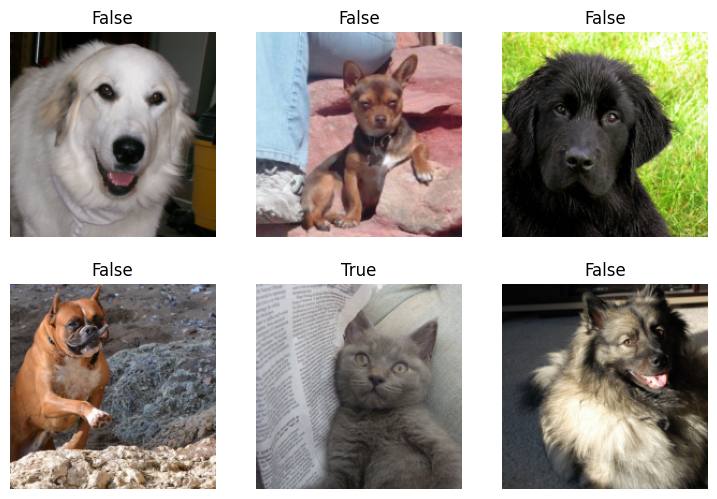

In [2]:
dls.show_batch(max_n=6, nrows=2)

### Treinando o modelo

In [3]:
learn = vision_learner(dls, models.resnet50, metrics=accuracy)
learn.fine_tune(3)
learn.path = Path('.')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.130706,0.029240,0.993234,01:10


epoch,train_loss,valid_loss,accuracy,time
0,0.058488,0.035531,0.989851,01:13
1,0.038926,0.011413,0.995940,01:08
2,0.017671,0.008805,0.996617,01:10


In [4]:
learn.export('pets.pkl')

### Deploy usando Gradio

In [5]:
#|default_exp app

In [6]:
#|export
!pip install -q gradio
import gradio as gr

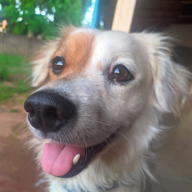

In [15]:
img = PILImage.create('dog.jpg')
img.thumbnail((192,192))
img

In [8]:
#|export
learn = load_learner('pets.pkl')

In [9]:
%time learn.predict(im)

CPU times: user 203 ms, sys: 21.6 ms, total: 224 ms
Wall time: 311 ms


('False', tensor(0), tensor([9.9985e-01, 1.5215e-04]))

In [18]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))


In [19]:
classify_image(img)

{'Dog': 0.9998478889465332, 'Cat': 0.00015214571612887084}

In [11]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


In [12]:
!pip install -q nbdev
import nbdev

In [13]:
nbdev.export.nb_export('/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs.ipynb', 'PetClassifier')
print('Sucesso')

Sucesso


### Link para o HuggingFace


> https://huggingface.co/spaces/lopesdri/PetClassifier

